In [1]:
import duckdb
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Connect to DuckDB
DB_NAME = "amazing.duckdb"
con = duckdb.connect(DB_NAME)

# Step 1: Create User-Item Matrix
print("Creating User-Item Matrix...")
query = """
    SELECT user_id, product_id, COUNT(*) AS interactions
    FROM all_events
    WHERE event_type IN ('view', 'purchase')
    GROUP BY user_id, product_id
"""


Creating User-Item Matrix...


In [2]:
user_item = con.execute(query).fetch_df()

user_item_df = user_item.head(10000)

user_item_df.head(10)


,user_id,product_id,interactions
0,507412213,37500560,30
1,517929650,1005102,1
2,521377730,4400405,2
3,514563827,5600355,12
4,553470945,12711927,8
5,530031648,26200597,1
6,513047694,7101633,1
7,512843334,1004886,2
8,512608507,3700866,1
9,519790495,5701166,1


In [3]:

# Pivot the data to create a User-Item matrix
user_item_matrix = user_item_df.pivot(index='user_id', columns='product_id', values='interactions').fillna(0)

user_item_matrix.head(10)

product_id,1000978,1001588,1002042,1002098,1002099,1002102,1002398,1002482,1002524,1002528,...,9800351,9800371,9800394,9800413,9800430,9800480,9800629,9800634,9900152,9900449
user_id,,,,,,,,,,,,,,,,,,,,,
388594905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405839931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413680253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421615289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425306612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426163705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427391662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427618400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
430977658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Step 2: Dimensionality Reduction (Optional)
print("Applying PCA for dimensionality reduction...")
pca = PCA(n_components=50)  # Reduce to 50 dimensions
user_item_reduced = pca.fit_transform(user_item_matrix)




Applying PCA for dimensionality reduction...


Clustering users...


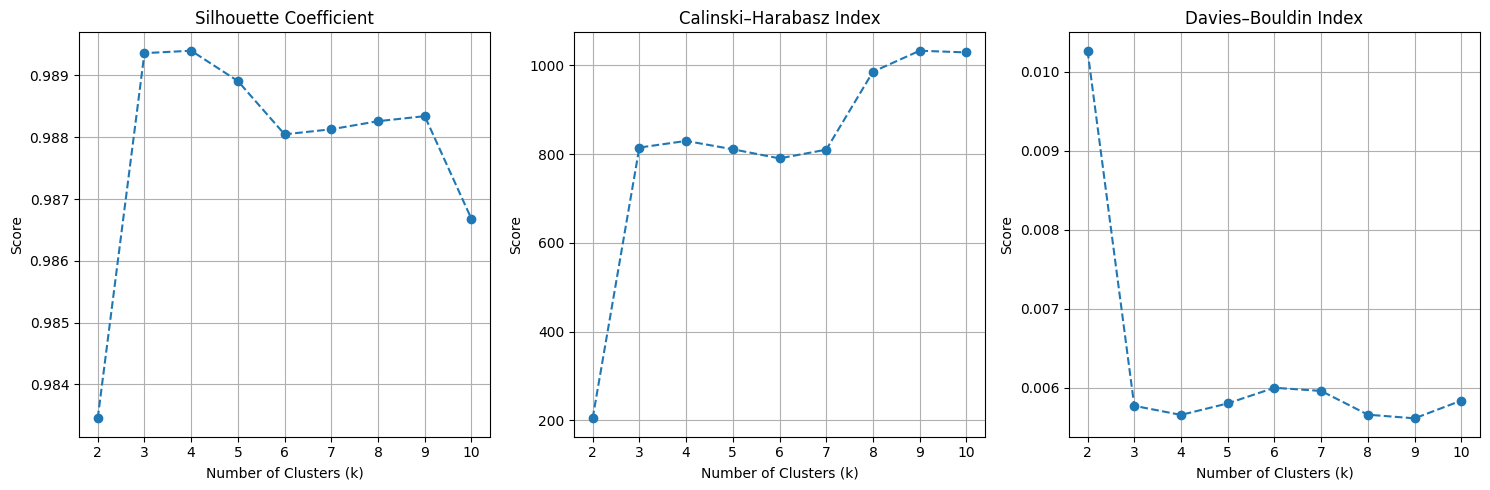

In [5]:
# Step 3: Clustering
print("Clustering users...")
ks = range(2, 11)
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(user_item_reduced)
    
    # Compute metrics
    silhouette_scores.append(silhouette_score(user_item_reduced, clusters))
    calinski_harabasz_scores.append(calinski_harabasz_score(user_item_reduced, clusters))
    davies_bouldin_scores.append(davies_bouldin_score(user_item_reduced, clusters))

# Step 4: Plot Metrics
plt.figure(figsize=(15, 5))

# Silhouette Coefficient
plt.subplot(1, 3, 1)
plt.plot(ks, silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Coefficient")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)

# Calinski–Harabasz Index
plt.subplot(1, 3, 2)
plt.plot(ks, calinski_harabasz_scores, marker='o', linestyle='--')
plt.title("Calinski–Harabasz Index")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)

# Davies–Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(ks, davies_bouldin_scores, marker='o', linestyle='--')
plt.title("Davies–Bouldin Index")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.grid(True)

plt.tight_layout()
plt.show()


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Backup the original User-Item matrix
original_user_item_matrix = user_item_matrix.copy()

# Train the KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(original_user_item_matrix.values)

# Apply KMeans clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(original_user_item_matrix.values)

kmeans = KMeans(n_clusters=5, random_state=42)
user_clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
user_item_matrix['Cluster'] = user_clusters

# Define the function to get similar users
def get_similar_users3d(user, n=5):
    knn_input = np.asarray([original_user_item_matrix.values[user - 1]])
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n + 1)

    print("Top", n, "users who are very much similar to the User-", user, "are: ")
    for i in range(1, len(distances[0])):
        print(i, ". User:", indices[0][i] + 1, "separated by distance of", distances[0][i])
    return indices.flatten()[1:] + 1, distances.flatten()[1:]

# Define the 3D visualization function
def visualize_clusters_3d(user_id, user_item_matrix, user_clusters, similar_user_list):
    data_matrix = original_user_item_matrix.values

    # Reduce dimensions with PCA
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(data_matrix)

    # Create a DataFrame for visualization
    cluster_df = pd.DataFrame(reduced_data, columns=["PCA1", "PCA2", "PCA3"])
    cluster_df["Cluster"] = user_clusters
    cluster_df["user_id"] = user_item_matrix.index

    # Add user type information
    cluster_df["type"] = "Other Users"
    cluster_df.loc[user_id - 1, "type"] = "Input User"
    for sim_user in similar_user_list:
        cluster_df.loc[sim_user - 1, "type"] = "Similar Users"

    # Create the 3D plot
    fig = px.scatter_3d(
        cluster_df,
        x="PCA1",
        y="PCA2",
        z="PCA3",
        color="Cluster",
        symbol="type",
        size=cluster_df["type"].apply(lambda x: 10 if x == "Input User" else 5),
        title="3D Representation of User Clusters",
        labels={"Cluster": "User Cluster"},
        hover_data=["user_id"]
    )

    fig.show()

# Example Inputs
user_id = 778
sim_users = 5

# Get similar users
similar_user_list, distance_list = get_similar_users3d(user_id, sim_users)

# Visualize clusters in 3D
visualize_clusters_3d(user_id, user_item_matrix, user_clusters, similar_user_list)

Top 5 users who are very much similar to the User- 778 are: 
1 . User: 6989 separated by distance of 0.0
2 . User: 3885 separated by distance of 0.0
3 . User: 6422 separated by distance of 1.0
4 . User: 6420 separated by distance of 1.0
5 . User: 6418 separated by distance of 1.0


In [ ]:
# Step 5: Save Clustering Results
optimal_k = 4  # Choose the optimal number of clusters based on the metrics
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
user_item_matrix['cluster'] = kmeans.fit_predict(user_item_reduced)

# Save the results back to DuckDB
print("Saving clustering results...")
con.register("user_clusters", user_item_matrix.reset_index())
con.execute("DROP TABLE IF EXISTS user_segments")
con.execute("CREATE TABLE user_segments AS SELECT * FROM user_clusters")

print("Clustering completed and saved!")

Saving clustering results...
Clustering completed and saved!
